In [16]:
import sys
base_dir = "D:/Thesis/Cobra/cobra/"
if base_dir not in sys.path:
    sys.path.append(base_dir)
from os.path import join
import pandas as pd
from utilities import utils
from stats_tools import vis as svis
import numpy as np
from access_sif_data import load_data_tools as ld

#import chart_studio.plotly as py
#import plotly.express as px
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import cufflinks as cf
#init_notebook_mode(connected=True)
#cf.go_offline()


import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline
plt.rcParams["figure.dpi"] = 40
plt.style.use('ggplot')
import importlib
importlib.reload(svis)

<module 'stats_tools.vis' from 'D:/Thesis/Cobra/cobra\\stats_tools\\vis.py'>

In [7]:
TE_k = 'EchoTime'
TR_k = 'RepetitionTime'
TI_k = 'InversionTime'
FA_k = 'FlipAngle'
SD_k = 'SeriesDescription'
PID_k = 'PatientID'
time_k = 'InstanceCreationTime'
date_k = 'InstanceCreationDate'
DT_k = 'DateTime'
SID_k = 'SeriesInstanceUID'
SS_k = 'ScanningSequence'
SV_k = 'SequenceVariant'
SN_k = 'SequenceName'
SO_k = 'ScanOptions'
ETL_k = 'EchoTrainLength'
MFS_k = 'MagneticFieldStrength'

In [27]:
fig_dir = join(base_dir, 'figs')
table_dir = join(base_dir, 'data/tables')
df = utils.load_scan_csv(join(table_dir, 'neg_pos.csv'))
presentation_dir = f"{fig_dir}/Presentation/Study_design/figs"

ipykernel_launcher:3: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.


# Patient Counts

## All

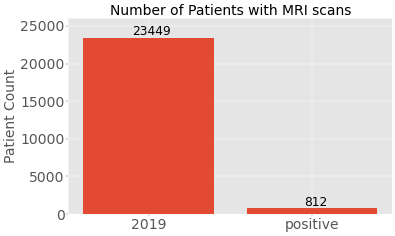

In [28]:
labels = ['2019', 'positive']
pos_mask = df.Positive==1
pos_pat_count = df[PID_k][pos_mask].nunique()
neg_pat_count = df[PID_k][~pos_mask].nunique()
counts = np.array([neg_pat_count, pos_pat_count])
kwargs={'xlabel':'', 'show':False, 'yrange':(0,26000),
        'ylabel':'Patient Count', 'title':'Number of Patients with MRI scans'}
fig, ax = svis.bar(labels, counts, kwargs=kwargs)
ax.text(1-.05, pos_pat_count+300, pos_pat_count, fontsize=22)
ax.text(0-.1, neg_pat_count+300, neg_pat_count, fontsize=22)
fig.savefig(f"{presentation_dir}/patient_count_all.png", dpi=150)

## Remove missing dates

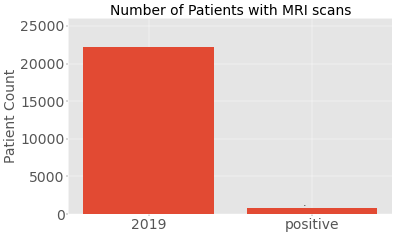

In [29]:
df = df[~df.InstanceCreationDate.isnull()]
pos_mask = df.Positive==1
pos_pat_count = df[PID_k][pos_mask].nunique()
neg_pat_count = df[PID_k][~pos_mask].nunique()
counts = np.array([neg_pat_count, pos_pat_count])
kwargs={'xlabel':'', 'show':False, 'yrange':(0,26000),
        'ylabel':'Patient Count', 'title':'Number of Patients with MRI scans'}
fig, ax = svis.bar(labels, counts, kwargs=kwargs)
ax.text(1-.05, pos_pat_count+300, pos_pat_count, fontsize=22)
ax.text(0-.1, neg_pat_count+300, neg_pat_count, fontsize=22)
fig.savefig(f"{presentation_dir}/patient_count_rm_dates.png", dpi=150)

## Remove 'other' sequences

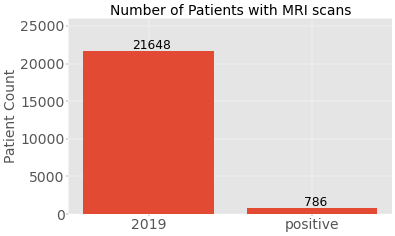

In [30]:
rel_seq = ['t2', 't1', 'flair', 'swi', 'dwi', 't2s']
df = df[df.Sequence.isin(rel_seq)]
labels = ['2019', 'positive']
pos_mask = df.Positive==1
pos_pat_count = df[PID_k][pos_mask].nunique()
neg_pat_count = df[PID_k][~pos_mask].nunique()
counts = np.array([neg_pat_count, pos_pat_count])
kwargs={'xlabel':'', 'show':False, 'yrange':(0,26000),
        'ylabel':'Patient Count', 'title':'Number of Patients with MRI scans'}
fig, ax = svis.bar(labels, counts, kwargs=kwargs)
ax.text(1-.05, pos_pat_count+300, pos_pat_count, fontsize=22)
ax.text(0-.1, neg_pat_count+300, neg_pat_count, fontsize=22)
fig.savefig(f"{presentation_dir}/patient_count_rm_dates_and_seq_other.png", dpi=150)